<h1 id='tocheading'>Table of Content</h1>
<div id='toc'></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

# Data Cleaning

In [2]:
# frequently used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
from datetime import date

## Order Dataset

In [3]:
# read data from csv file
order_df = pd.read_csv('olist_orders_dataset.csv')
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
# drop unnecessary columns
order_df.drop(['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date'], axis=1, inplace=True)
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
order_id                    99441 non-null object
customer_id                 99441 non-null object
order_purchase_timestamp    99441 non-null object
dtypes: object(3)
memory usage: 2.3+ MB


In [5]:
# assign variable type
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
order_df.dtypes

order_id                            object
customer_id                         object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [6]:
order_df['purchase_date'] = order_df['order_purchase_timestamp'].dt.date

In [7]:
order_df.drop('order_purchase_timestamp', axis='columns', inplace=True)
order_df.head()

,order_id,customer_id,purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13


In [8]:
# duplicate rows
order_df[order_df.duplicated()]

,order_id,customer_id,purchase_date


In [9]:
# data entries
order_df.head()

,order_id,customer_id,purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13


## Payment Dataset

In [10]:
# read data from csv file
payment_df = pd.read_csv('olist_order_payments_dataset.csv')
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [11]:
# drop unnecessary columns
payment_df.drop(['payment_sequential', 'payment_type','payment_installments'], axis='columns', inplace=True)
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 2 columns):
order_id         103886 non-null object
payment_value    103886 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


In [12]:
# duplicate rows
payment_df[payment_df.duplicated()]

,order_id,payment_value
3675,8ca5bdac5ebe8f2d6fc9171d5ebc906a,15.00
4829,59d02be1c50fb6e6930cafd6ff6a31e5,20.00
5091,4689b1816de42507a7d63a4617383c59,56.42
6940,cf101c3abd3c061ca9f78c1bbb1125af,8.46
7441,d744783ed2ace06cac647a9e64dcbcfd,1.47
...,...,...
102942,dbc097913df341f30b9f9e92f459cee2,50.00
103046,c5fd5386640ddd76adc482b72d24a02b,5.79
103216,4d9190887b47ff1b89c657c788c038f6,12.80
103551,1ea11b975aea60ca92fa0559184d3d34,12.69


In [13]:
payment_df.head()

,order_id,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71
3,ba78997921bbcdc1373bb41e913ab953,107.78
4,42fdf880ba16b47b59251dd489d4441a,128.45


In [14]:
payment_df.nunique()

order_id         99440
payment_value    29077
dtype: int64

## Customer Dataset

In [15]:
# read data from csv file
customer_df = pd.read_csv('olist_customers_dataset.csv')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [16]:
# drop unnecessary columns
customer_df.drop(['customer_zip_code_prefix', 'customer_city', 'customer_state'], axis=1, inplace=True)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
customer_id           99441 non-null object
customer_unique_id    99441 non-null object
dtypes: object(2)
memory usage: 1.5+ MB


In [17]:
customer_df[customer_df.duplicated()]

,customer_id,customer_unique_id


In [18]:
customer_df.head()

,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066


## Joined Dataset

In [19]:
payment_order_df = pd.merge(payment_df, order_df, how='left', on='order_id')
payment_order_df.head()

,order_id,payment_value,customer_id,purchase_date
0,b81ef226f3fe1789b1e8b2acac839d17,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25
1,a9810da82917af2d9aefd1278f1dcfa0,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12
3,ba78997921bbcdc1373bb41e913ab953,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06
4,42fdf880ba16b47b59251dd489d4441a,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21


In [20]:
pay_order_cust_df = pd.merge(payment_order_df, customer_df, how='left', on='customer_id')
pay_order_cust_df.head()

,order_id,payment_value,customer_id,purchase_date,customer_unique_id
0,b81ef226f3fe1789b1e8b2acac839d17,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25,708ab75d2a007f0564aedd11139c7708
1,a9810da82917af2d9aefd1278f1dcfa0,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26,a8b9d3a27068454b1c98cc67d4e31e6f
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12,6f70c0b2f7552832ba46eb57b1c5651e
3,ba78997921bbcdc1373bb41e913ab953,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06,87695ed086ebd36f20404c82d20fca87
4,42fdf880ba16b47b59251dd489d4441a,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21,4291db0da71914754618cd789aebcd56


In [21]:
pay_order_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id              103886 non-null object
payment_value         103886 non-null float64
customer_id           103886 non-null object
purchase_date         103886 non-null object
customer_unique_id    103886 non-null object
dtypes: float64(1), object(4)
memory usage: 4.8+ MB


In [22]:
pay_order_cust_df.to_csv('poc.csv', index=False);

In [23]:
#pay_order_cust_df = pay_order_cust_df.sample(frac=0.1)
pay_order_cust_df.shape[0]

103886

# Feature Engineering

In [24]:
rfm_df = pay_order_cust_df.groupby('customer_unique_id').agg({'purchase_date':'max', 'order_id':'count', 'payment_value':'sum'})
%timeit
rfm_df.purchase_date = rfm_df.purchase_date.apply(lambda x: (max(rfm_df.purchase_date)-x).days)
rfm_df.columns = ['recency', 'frequency', 'monetary']
rfm_df.to_csv('rfm.csv', index=False);
rfm_df.head()

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
0000f46a3911fa3c0805444483337064,586,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
0004aac84e0df4da2b147fca70cf8255,337,1,196.89


In [25]:
rfm_df = pd.read_csv('rfm.csv')
rfm_df.head()

,recency,frequency,monetary
0,160,1,141.90
1,163,1,27.19
2,586,1,86.22
3,370,1,43.62
4,337,1,196.89


# EDA

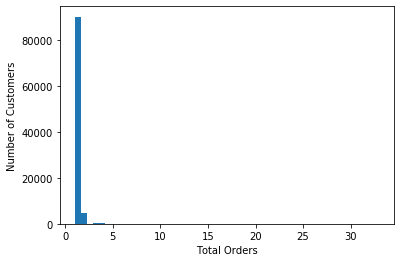

In [26]:
plt.hist(rfm_df.frequency, bins=50)
plt.xlabel('Total Orders')
plt.ylabel('Number of Customers');

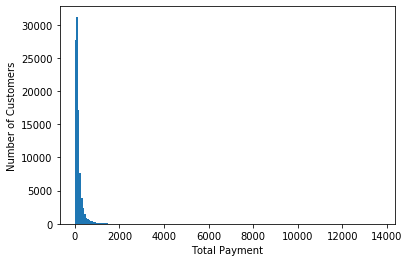

In [27]:
plt.hist(rfm_df.monetary, bins=200)
plt.xlabel('Total Payment')
plt.ylabel('Number of Customers');

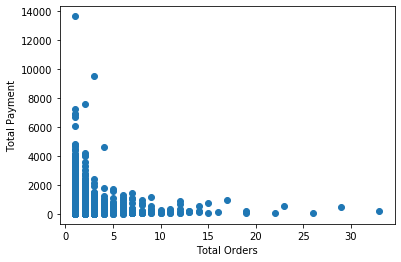

In [28]:
plt.scatter(rfm_df.frequency,rfm_df.monetary)
plt.xlabel('Total Orders')
plt.ylabel('Total Payment');

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm_df)
print('Mean:', scaler.mean_)
print('Std:', np.sqrt(scaler.var_))

Mean: [288.10386597   1.08107602 166.59422571]
Std: [153.41025211   0.46254517 231.42770773]


# K-means Clustering

## Elbow Diagram

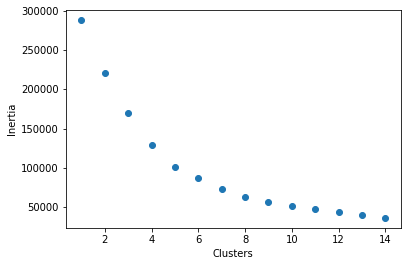

In [30]:
from sklearn.cluster import KMeans
inertia_dict = {}
for k in range(1,15):
    rfm_km = KMeans(n_clusters=k).fit(X_scaled)
    inertia_dict[k] = rfm_km.inertia_
    
plt.scatter(inertia_dict.keys(), inertia_dict.values())
plt.xlabel('Clusters')
plt.ylabel('Inertia');

In [31]:
n_clusters = 4

## K-means Clustering

In [32]:
km = KMeans(n_clusters=n_clusters).fit(X_scaled)
labels = km.labels_

Text(0, 0.5, 'Monetary')

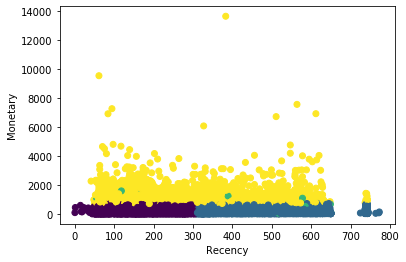

In [33]:
plt.scatter(rfm_df.recency, rfm_df.monetary, c=labels)
plt.xlabel('Recency')
plt.ylabel('Monetary')

Text(0, 0.5, 'Monetary')

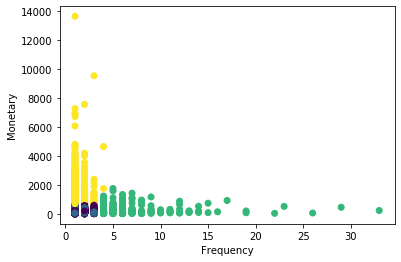

In [34]:
plt.scatter(rfm_df.frequency, rfm_df.monetary, c=labels)
plt.xlabel('Frequency')
plt.ylabel('Monetary')

In [35]:
np.bincount(labels)

array([53458, 39533,   372,  2732], dtype=int64)

In [36]:
label_count_df = pd.DataFrame(labels)

In [37]:
km.cluster_centers_

array([[-7.21365511e-01, -4.65197158e-02, -1.23644825e-01],
       [ 9.74312490e-01, -4.61176325e-02, -1.29607671e-01],
       [ 1.26818603e-01,  1.07274597e+01,  2.96882905e-01],
       [-8.87320297e-04,  1.17151608e-01,  4.26086921e+00]])

In [38]:
km.cluster_centers_[1,1]

-0.04611763249132524

In [39]:
n_clusters

4

In [40]:
customer_segment_list = []
for cluster in range(n_clusters):
    if km.cluster_centers_[cluster, 0] > 0:
        customer_segment_list.append('current | ')
    else:
        customer_segment_list.append('churned | ')
    if km.cluster_centers_[cluster, 1] > 0:
        customer_segment_list[cluster] += 'regular | '
    else:
        customer_segment_list[cluster] += 'one time | '
    if km.cluster_centers_[cluster, 2] > 0:
        customer_segment_list[cluster] += 'high value'
    else:
        customer_segment_list[cluster] += 'low value'

customer_segment_list

['churned | one time | low value',
 'current | one time | low value',
 'current | regular | high value',
 'churned | regular | high value']

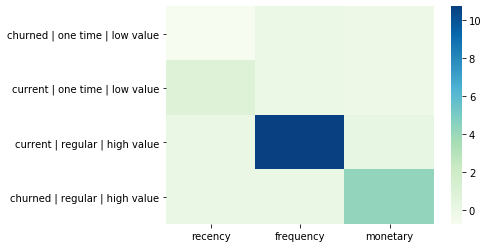

In [41]:
import seaborn as sns
import string
sns.heatmap(km.cluster_centers_, cmap='GnBu', 
            xticklabels=rfm_df.columns,
            yticklabels=customer_segment_list)

In [42]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)


Text(0, 0.5, 'TSNE 2')

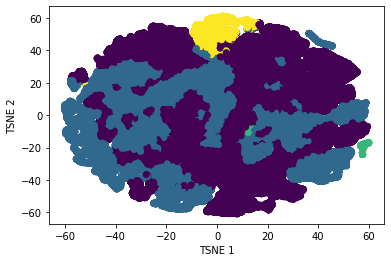

In [43]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

In [44]:
poc3m_df = pay_order_cust_df[(date(2017,4,1) <= pay_order_cust_df.purchase_date) &
                              (pay_order_cust_df.purchase_date < date(2017,7,1))]
poc6m_df = pay_order_cust_df[(date(2017,7,1) <= pay_order_cust_df.purchase_date) & 
                              (pay_order_cust_df.purchase_date < date(2018,2,1))]

In [45]:
rfm3m_df = poc3m_df.groupby('customer_unique_id').agg({'purchase_date':'max', 'order_id':'count', 'payment_value':'sum'})
rfm3m_df.purchase_date = rfm3m_df.purchase_date.apply(lambda x: max(rfm3m_df.purchase_date)-x)
rfm3m_df.columns = ['recency', 'frequency', 'monetary']
rfm3m_df.head()

,recency,frequency,monetary
customer_unique_id,,,
0011805441c0d1b68b48002f1d005526,67 days,1,297.14
0011857aff0e5871ce5eb429f21cdaf5,2 days,1,192.83
00191a9719ef48ebb5860b130347bf33,72 days,1,58.86
001a2bf0e46c684031af91fb2bce149d,1 days,1,36.73
002d71b244beb91ca7030b15ab526446,39 days,1,130.56


In [46]:
rfm3m_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9139 entries, 0011805441c0d1b68b48002f1d005526 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
recency      9139 non-null timedelta64[ns]
frequency    9139 non-null int64
monetary     9139 non-null float64
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 285.6+ KB


In [47]:
rfm3m_df.head()

,recency,frequency,monetary
customer_unique_id,,,
0011805441c0d1b68b48002f1d005526,67 days,1,297.14
0011857aff0e5871ce5eb429f21cdaf5,2 days,1,192.83
00191a9719ef48ebb5860b130347bf33,72 days,1,58.86
001a2bf0e46c684031af91fb2bce149d,1 days,1,36.73
002d71b244beb91ca7030b15ab526446,39 days,1,130.56


In [48]:
m6m_df = poc6m_df.groupby('customer_unique_id')['payment_value'].sum()
m6m_df

customer_unique_id
0000f6ccb0745a6a4b88665a16c9f078     43.62
0004aac84e0df4da2b147fca70cf8255    196.89
0006fdc98a402fceb4eb0ee528f6a8d4     29.00
00082cbe03e478190aadbea78542e933    126.26
000a5ad9c4601d2bbdd9ed765d5213b3     91.28
                                     ...  
fff7219c86179ca6441b8f37823ba3d3    265.80
fffa431dd3fcdefea4b1777d114144f2     81.20
fffb09418989a0dbff854a28163e47c6     73.16
fffbf87b7a1a6fa8b03f081c5f51a201    167.32
fffea47cd6d3cc0a88bd621562a9d061     84.58
Name: payment_value, Length: 36768, dtype: float64

In [49]:
rfm3m_m6m_df = pd.merge(rfm3m_df, m6m_df)
rfm3m_m6m_df

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False